In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#acquire
import acquire
from env import host, username, password
from pydataset import data

# Acquire & Prep Data

## Acquire data - zillow_data()

In [90]:
df = acquire.zillow_data()

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        223 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77580 non-null  float64
 3   heatingorsystemtypeid         49572 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      207 non-null    float64
 6   airconditioningtypeid         25007 non-null  float64
 7   parcelid                      77580 non-null  int64  
 8   id                            77580 non-null  int64  
 9   logerror                      77580 non-null  float64
 10  transactiondate               77580 non-null  object 
 11  id                            77580 non-null  int64  
 12  basementsqft                  50 non-null     float64
 13  b

## Prep Zillow Data - prepare_zillow()

In [16]:
X_train, X_validate, X_test = acquire.prepare_zillow(df)

train -> (27124, 30)
validate -> (11625, 30)
test -> (9688, 30)


### Control check to make sure we've addressed nulls

In [5]:
X_train.shape, X_validate.shape, X_test.shape

((27124, 30), (11625, 30), (9688, 30))

***
Note: I acquired and prepped the data above but after reviewing my data and trying to game plan, I decide to pare down collinearity by eliminating redundant information
***

In [39]:
# Create un-split df for exploration
df2 = acquire.zillow_data()

In [40]:
df2 = acquire.prepare_zillow_lite(df2)

In [41]:
df2.isnull().sum()

propertylandusetypeid           0
parcelid                        0
id                              0
logerror                        0
transactiondate                 0
id                              0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
propertylandus

In [97]:
df.transactiondate.head()

0    2017-01-01
1    2017-01-01
2    2017-01-01
3    2017-01-01
4    2017-01-01
Name: transactiondate, dtype: object

In [95]:
# Convert transactiondate to datetime
df2['transactiondate'] = pd.to_datetime(df2.transactiondate)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48437 entries, 0 to 77579
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   propertylandusetypeid         48437 non-null  float64       
 1   parcelid                      48437 non-null  int64         
 2   logerror                      48437 non-null  float64       
 3   transactiondate               48437 non-null  datetime64[ns]
 4   bathroomcnt                   48437 non-null  float64       
 5   bedroomcnt                    48437 non-null  float64       
 6   calculatedfinishedsquarefeet  48437 non-null  float64       
 7   fips                          48437 non-null  float64       
 8   latitude                      48437 non-null  float64       
 9   longitude                     48437 non-null  float64       
 10  lotsizesquarefeet             48437 non-null  float64       
 11  propertycountylandusecode   

In [65]:
# drop assessment year, 2016
df2 = df2.drop(columns=(['assessmentyear']))

### Explore collinearity amongst independent variables

In [36]:
# Separate variables by associations, adding in target
sqft = ['calculatedfinishedsquarefeet', 'finishedsquarefeet12']
bath = ['bathroomcnt', 'fullbathcnt', 'bedroomcnt', 'calculatedbathnbr']
value = ['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']
loc = ['latitude', 'longitude', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidzip', 'censustractandblock']

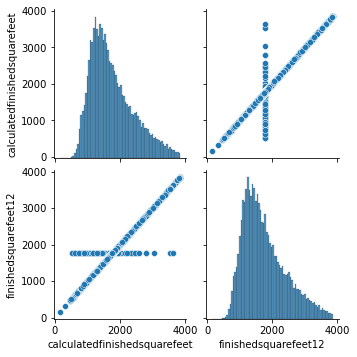

In [15]:
sns.pairplot(data = df2[sqft])

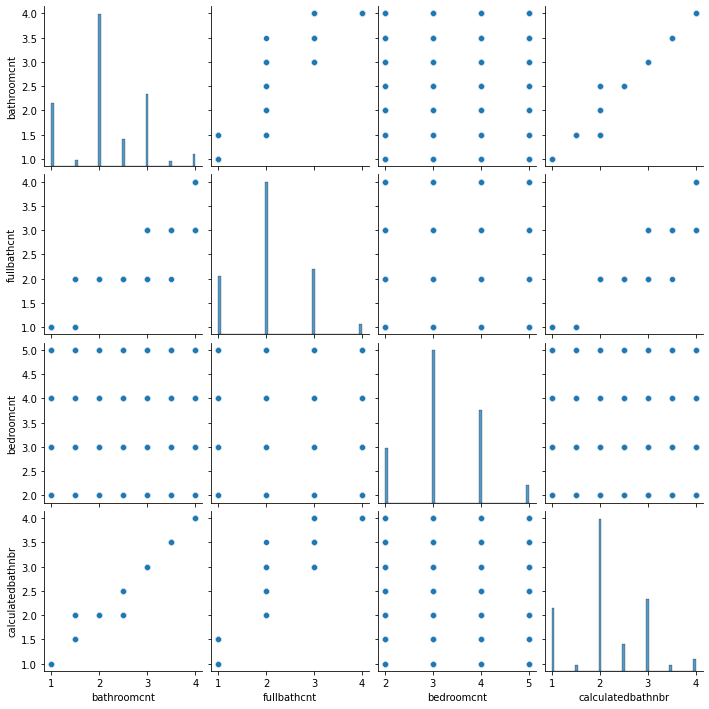

In [37]:
sns.pairplot(data = df2[bath])

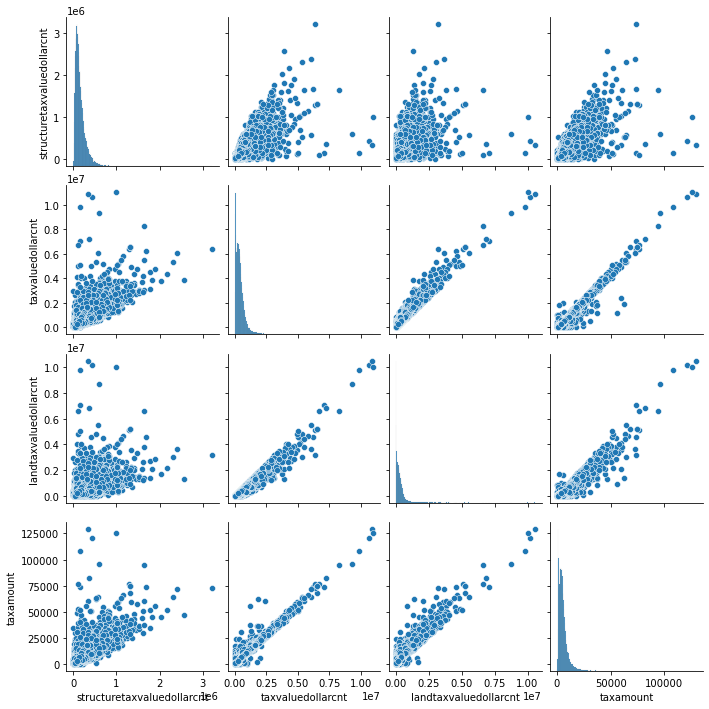

In [17]:
sns.pairplot(data = df2[value])

In [23]:
df2[sqft].corr()

,calculatedfinishedsquarefeet,finishedsquarefeet12
calculatedfinishedsquarefeet,1.000000,0.998013
finishedsquarefeet12,0.998013,1.000000


In [38]:
df2[bath].corr()

,bathroomcnt,fullbathcnt,bedroomcnt,calculatedbathnbr
bathroomcnt,1.000000,0.977535,0.577860,0.999937
fullbathcnt,0.977535,1.000000,0.565157,0.977595
bedroomcnt,0.577860,0.565157,1.000000,0.577833
calculatedbathnbr,0.999937,0.977595,0.577833,1.000000


In [24]:
df2[value].corr()

,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
structuretaxvaluedollarcnt,1.000000,0.743992,0.539022,0.749919
taxvaluedollarcnt,0.743992,1.000000,0.963723,0.981020
landtaxvaluedollarcnt,0.539022,0.963723,1.000000,0.937631
taxamount,0.749919,0.981020,0.937631,1.000000


In [25]:
df2[loc].corr()

,latitude,longitude,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,censustractandblock
latitude,1.000000,-0.533704,-0.063068,-0.020002,0.578863,0.015413,-0.009538
longitude,-0.533704,1.000000,-0.385093,0.002332,-0.357550,0.029303,-0.039512
rawcensustractandblock,-0.063068,-0.385093,1.000000,-0.042617,-0.601546,0.041552,0.105129
regionidcity,-0.020002,0.002332,-0.042617,1.000000,0.064606,-0.012975,-0.006626
regionidcounty,0.578863,-0.357550,-0.601546,0.064606,1.000000,-0.050838,-0.061629
regionidzip,0.015413,0.029303,0.041552,-0.012975,-0.050838,1.000000,0.004016
censustractandblock,-0.009538,-0.039512,0.105129,-0.006626,-0.061629,0.004016,1.000000


In [42]:
df2 = df2.drop(columns=(['finishedsquarefeet12', 'taxvaluedollarcnt', 'taxamount', 'calculatedbathnbr', 'fullbathcnt']))

In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48437 entries, 0 to 77579
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         48437 non-null  float64
 1   parcelid                      48437 non-null  int64  
 2   logerror                      48437 non-null  float64
 3   transactiondate               48437 non-null  object 
 4   bathroomcnt                   48437 non-null  float64
 5   bedroomcnt                    48437 non-null  float64
 6   calculatedfinishedsquarefeet  48437 non-null  float64
 7   fips                          48437 non-null  float64
 8   latitude                      48437 non-null  float64
 9   longitude                     48437 non-null  float64
 10  lotsizesquarefeet             48437 non-null  float64
 11  propertycountylandusecode     48437 non-null  object 
 12  rawcensustractandblock        48437 non-null  float64
 13  r

***
#### Key Takeaways: 

    * calculatedfinishedsquarefeet & finishedsquarefeet12 highly correlated 
        * drop finishedsquarefeet  
    * calculatedbathnbr hihgly correlated with bathroomcnt less so with bedroomcnt
        * going to drop all except bathroomcnt & bedroomcnt 
    * taxvaluedollarcount highly correlated with all others in this group     
        * correlation b/w taxvaluedollarcnt & structuretaxvaluedollarcnt weaker, keep these two and drop others       
    * keeping taxvaluedollarcount & structuretaxvaluedollarcnt, dropping others
    * Not able to deal w/location features using correlation
        * categorical features
***

In [44]:
#dropping the id columns, as parcelid is a unique identifier
df2 = df2.drop(columns=('id'))

In [108]:
df2.corr().sort_values('logerror', ascending=False)

,propertylandusetypeid,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,censustractandblock
logerror,0.007813,0.007329,1.000000,0.017394,0.024607,0.018807,0.006185,-0.017668,0.023947,0.007760,0.006177,0.007051,-0.023491,-0.004057,0.015362,0.016264,-0.017032,-0.022973,0.005376
bedroomcnt,-0.037039,0.084343,0.024607,0.577860,1.000000,0.596151,0.144724,0.029701,0.001573,0.004564,0.145421,-0.048262,-0.149293,0.021119,0.199738,0.358112,0.316906,0.069436,0.020018
longitude,-0.070655,-0.064304,0.023947,0.011765,0.001573,0.006872,-0.382218,-0.533704,1.000000,-0.011295,-0.385093,0.002332,-0.357550,0.029303,-0.000911,0.094102,-0.093933,-0.005706,-0.039512
calculatedfinishedsquarefeet,-0.013221,0.073991,0.018807,0.788009,0.596151,1.000000,0.138223,-0.013393,0.006872,0.024071,0.138133,-0.055316,-0.173287,0.027338,0.137242,0.468993,0.656188,0.294643,0.012608
bathroomcnt,-0.006341,0.071713,0.017394,1.000000,0.577860,0.788009,0.128785,0.016788,0.011765,0.014763,0.129009,-0.059692,-0.168397,0.030270,0.115692,0.536101,0.561721,0.241117,0.012930
yearbuilt,0.033239,0.175206,0.016264,0.536101,0.358112,0.468993,0.294109,0.077893,0.094102,0.032060,0.296487,-0.086706,-0.341102,0.056638,0.198839,1.000000,0.383528,0.004507,0.033793
roomcnt,0.018501,0.428303,0.015362,0.115692,0.199738,0.137242,0.742506,-0.310234,-0.000911,-0.014830,0.740281,-0.051082,-0.782967,0.042296,1.000000,0.198839,-0.029382,0.038051,0.077062
propertylandusetypeid,1.000000,0.033827,0.007813,-0.006341,-0.037039,-0.013221,0.077009,0.034126,-0.070655,0.006389,0.077344,0.001216,-0.012133,0.003807,0.018501,0.033239,-0.020942,-0.013590,0.008212
lotsizesquarefeet,0.006389,-0.013941,0.007760,0.014763,0.004564,0.024071,-0.010700,0.058983,-0.011295,1.000000,-0.010033,-0.009217,0.024462,0.005129,-0.014830,0.032060,0.019816,-0.003846,-0.001359
parcelid,0.033827,1.000000,0.007329,0.071713,0.084343,0.073991,0.532157,-0.172625,-0.064304,-0.013941,0.531907,-0.023033,-0.394721,0.028112,0.428303,0.175206,0.047368,0.010212,0.056422


In [67]:
df2.logerror.describe()

count    48437.000000
mean         0.016504
std          0.168290
min         -4.655420
25%         -0.024978
50%          0.006045
75%          0.038109
max          3.394544
Name: logerror, dtype: float64

<AxesSubplot:xlabel='logerror', ylabel='Count'>

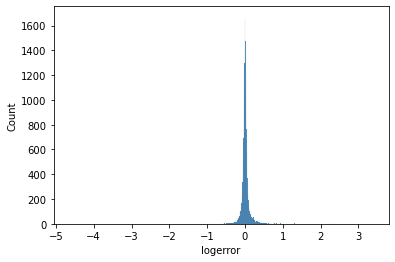

In [68]:
sns.histplot(data=df2.logerror)

In [71]:
# Create log quartile column to separate logerror extremes and identify trends
log_quantile = [1,2,3,4]
df2['log_quantile'] = pd.qcut(df2['logerror'], q=[0,.25,.5,.75,1], labels = log_quantile)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

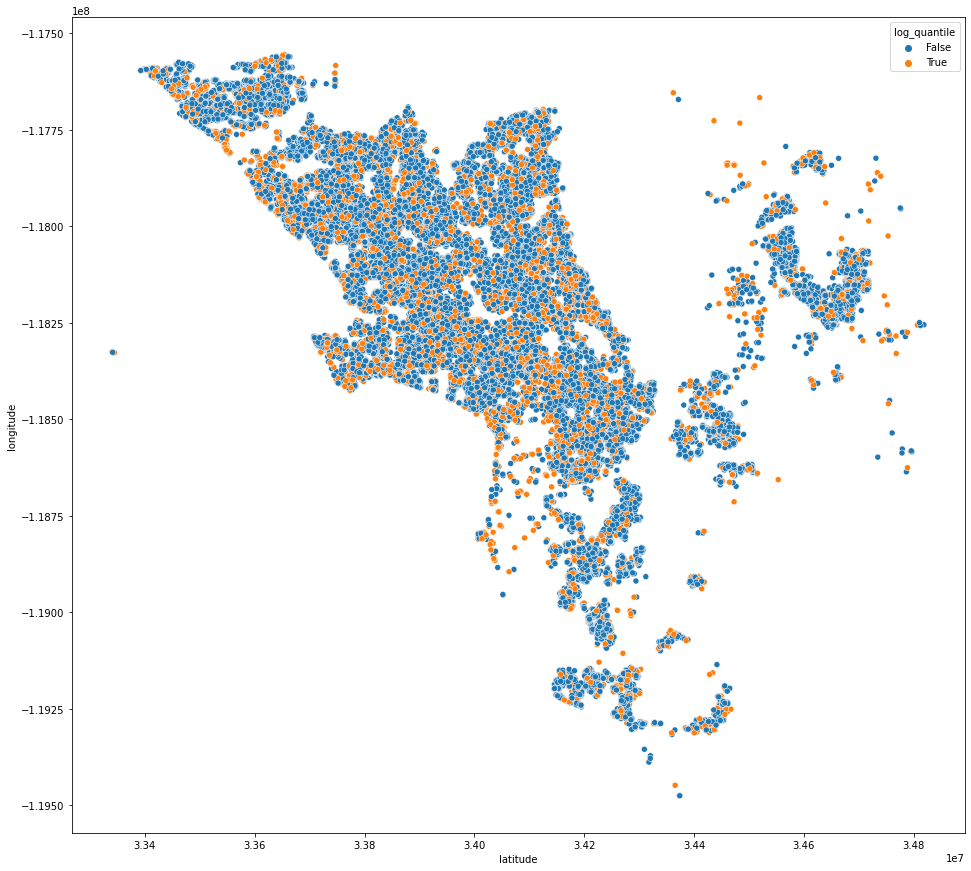

In [88]:
plt.figure(figsize=(16, 15))
sns.scatterplot(data=df2, x=df2.latitude, y=df2.longitude, hue=df2.log_quantile==4)

<AxesSubplot:xlabel='transactiondate', ylabel='logerror'>

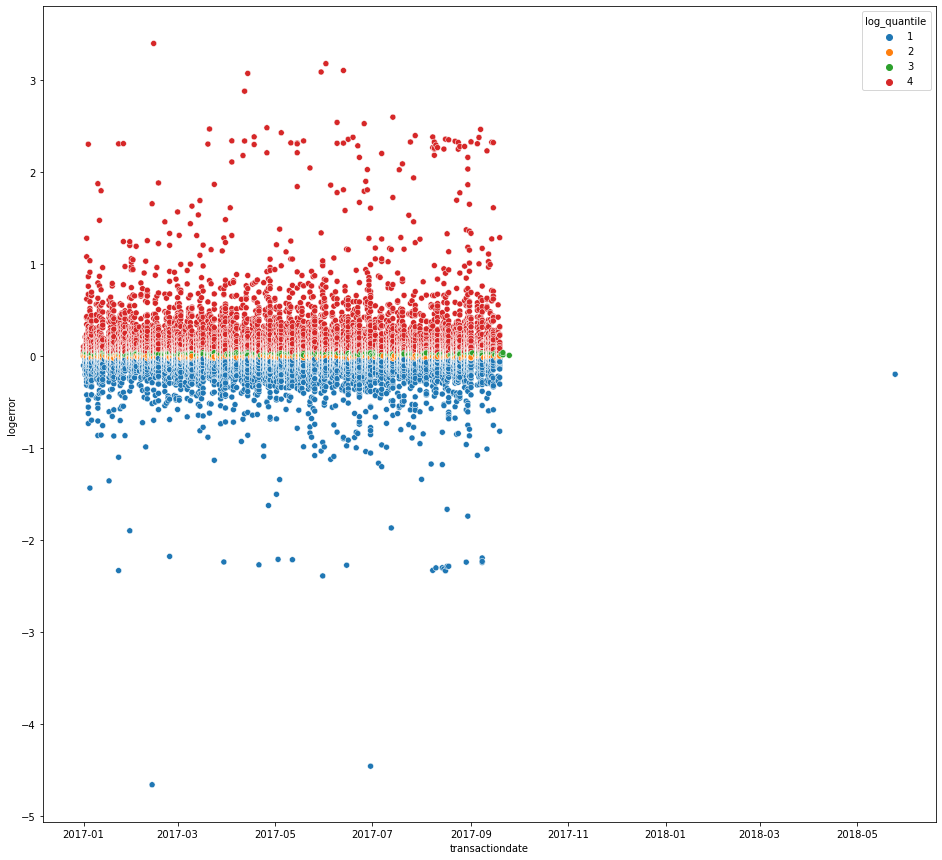

In [106]:
plt.figure(figsize=(16, 15))
sns.scatterplot(data=df2, x=df2.transactiondate, y=df2.logerror, hue=df2.log_quantile)

In [6]:
# Assign X to X_train for simplicity
X = X_train

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

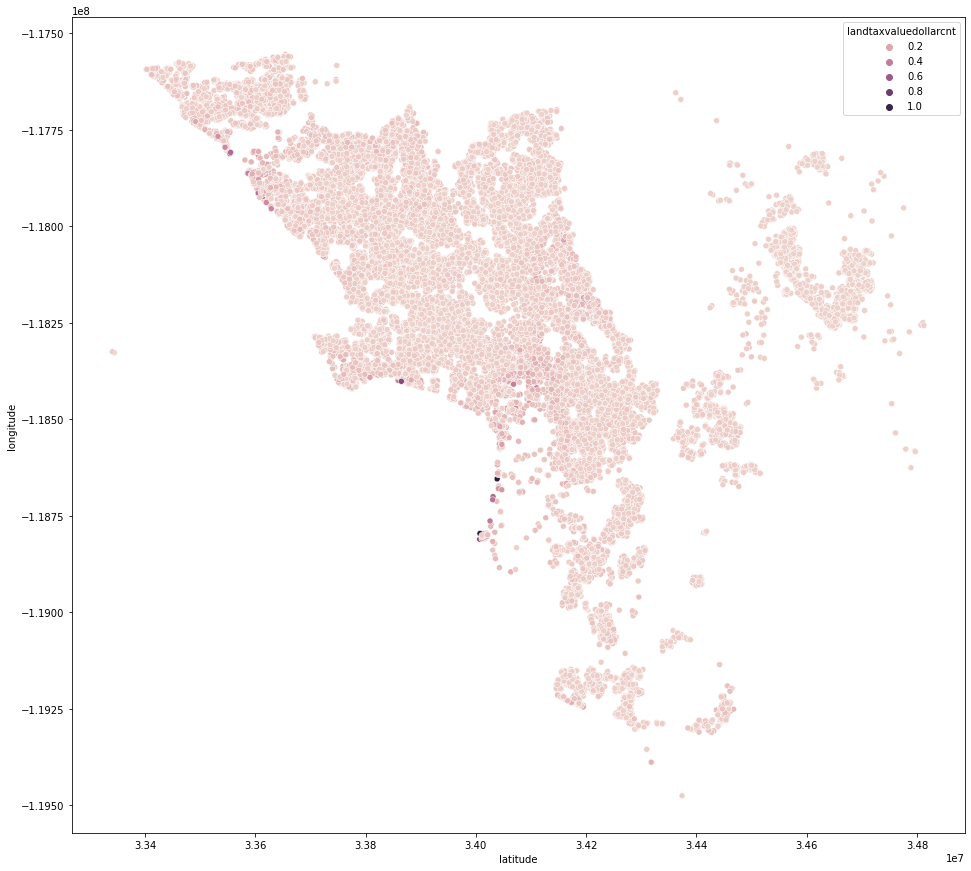

In [7]:
plt.figure(figsize=(16, 15))
sns.scatterplot(data=X, x=X.latitude, y=X.longitude, hue=X.landtaxvaluedollarcnt)

In [8]:
# Distribution of Assessed Values
X.landtaxvaluedollarcnt.describe()

count    2.712400e+04
mean     2.824450e+05
std      3.349906e+05
min      1.000000e+03
25%      6.896600e+04
50%      2.059020e+05
75%      3.816725e+05
max      1.054104e+07
Name: landtaxvaluedollarcnt, dtype: float64

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

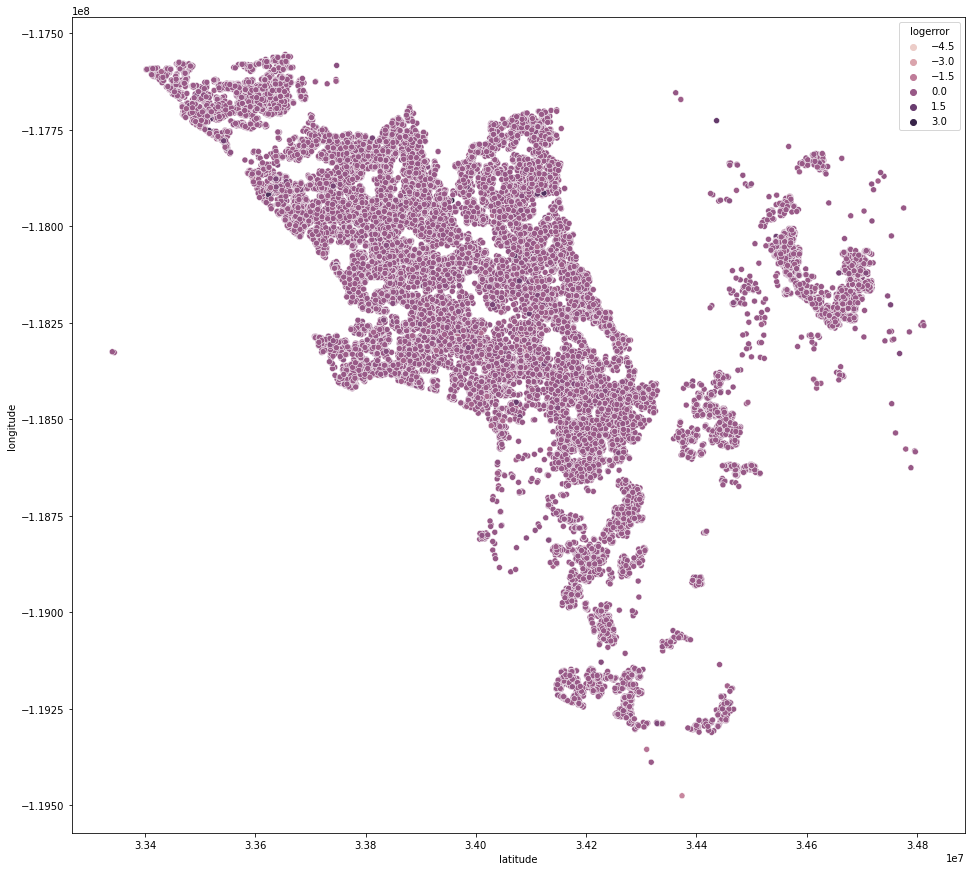

In [9]:
plt.figure(figsize=(16, 15))
sns.scatterplot(data=X, x=X.latitude, y=X.longitude, hue=X.logerror)

In [10]:
X.logerror.describe()

count    27124.000000
mean         0.016126
std          0.170258
min         -4.655420
25%         -0.025285
50%          0.005858
75%          0.037583
max          3.394544
Name: logerror, dtype: float64

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27124 entries, 68779 to 56030
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         27124 non-null  float64
 1   parcelid                      27124 non-null  int64  
 2   id                            27124 non-null  int64  
 3   logerror                      27124 non-null  float64
 4   transactiondate               27124 non-null  object 
 5   id                            27124 non-null  int64  
 6   bathroomcnt                   27124 non-null  float64
 7   bedroomcnt                    27124 non-null  float64
 8   calculatedbathnbr             27124 non-null  float64
 9   calculatedfinishedsquarefeet  27124 non-null  float64
 10  finishedsquarefeet12          27124 non-null  float64
 11  fips                          27124 non-null  float64
 12  fullbathcnt                   27124 non-null  float64
 1

In [13]:
X.propertycountylandusecode

68779    0101
28259    0100
7474     0101
25062    0101
9196     0101
         ... 
16656    0700
57731     122
10907    0100
31933    0100
56030    0100
Name: propertycountylandusecode, Length: 27124, dtype: object